In [1]:
from scaling_function import *
from scipy.integrate import quad

In [2]:
d = 3
d_t = 5

# Scaling Function

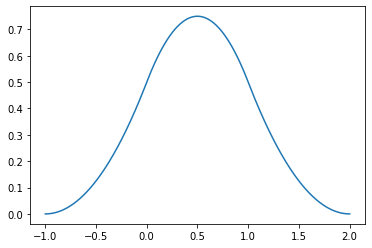

In [3]:
sf = PrimalScalingFunction(d)
sf.plot()

- Urban - 2009, Figure 2.11-2.14

In [4]:
l1_norm = quad(sf, sf.l1, sf.l2)[0]
print("L1 norm =", l1_norm)
assert np.isclose(l1_norm, 1.)

l2_norm = np.sqrt(quad(lambda x: sf(x)**2, sf.l1, sf.l2)[0])
print("L2 norm =", l2_norm)

L1 norm = 0.9999999999999994
L2 norm = 0.7416198485712339


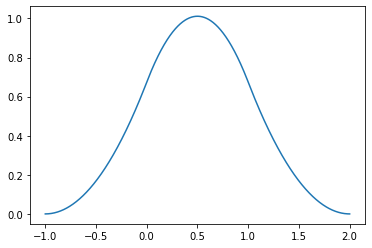

In [5]:
# L2 normalization
sf.plot(scale=1./l2_norm)

- Urban - 2009, Figure 5.5-5.11

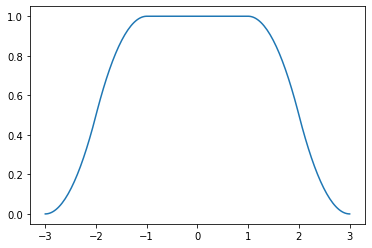

In [6]:
# partition of unity
nx = 200
x = np.linspace(-d, d, nx)
s = np.zeros(nx)
for k in range(sf.l1, sf.l2 + 1):
    s += sf(x + k)
plt.plot(x, s)
plt.show()
assert np.isclose(s[nx//2], 1.)

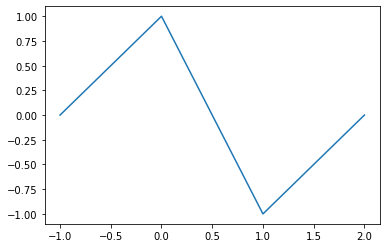

H1 norm = 1.244989959716471


In [7]:
# first order derivative
sf.plot(nu=1)

sf_deriv = sf.derivative()
h1_norm = np.sqrt(quad(lambda x: sf_deriv(x)**2, sf.l1, sf.l2)[0] + l2_norm**2)
print("H1 norm =", h1_norm)

In [8]:
a = sf.refinement_coeffs()
sum_a = a.sum()
print("refinement coefficients =", a)
print("sum =", sum_a)
assert np.isclose(sum_a, 2.)

refinement coefficients = [0.25 0.75 0.75 0.25]
sum = 2.0


- Urban - 2009, Table 2.6-2.7

In [9]:
g = sf.gramian()
if d == 3:
    g_ref = np.array([1/120, 13/60, 11/20, 13/60, 1/120])
    assert np.allclose(g, g_ref)

l2_norm_g = np.sqrt(g[d-1])
print("L2 norm from gramian =", l2_norm_g)
print("L2 norm from quadrature =", l2_norm)
assert np.isclose(l2_norm_g, l2_norm)

L2 norm from gramian = 0.7416198487095664
L2 norm from quadrature = 0.7416198485712339


- Primbs - 2008: For $d = 3$, $g = [1/120, 13/60, 11/20, 13/60, 1/120]$

In [10]:
h = sf.inner_product(nu=1)
if d == 3:
    h_ref = np.array([-32/3, -64/3, 64, -64/3, -32/3]) / 2**6
    assert np.allclose(h, h_ref)

h1_norm_h = np.sqrt(h[d-1] + g[d-1])
print("H1 norm from inner product =", h1_norm_h)
print("H1 norm from quadrature =", h1_norm)
assert np.isclose(h1_norm_h, h1_norm)

H1 norm from inner product = 1.2449899597988736
H1 norm from quadrature = 1.244989959716471


- Primbs - 2006, Beispiel 3.26: For $d = 3$ and $j = 3$, $h = [-32/3, -64/3, 64, -64/3, -32/3]$

# Dual Scaling Function

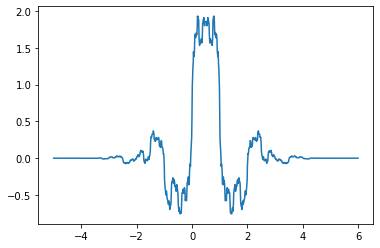

In [11]:
sf_t = DualScalingFunction(d, d_t)
sf_t.plot()

- Urban - 2009, Figure 2.11-2.14

In [12]:
l1_norm = quad(sf_t, sf_t.l1, sf_t.l2)[0]
print("L1 norm =", l1_norm)
assert np.isclose(l1_norm, 1., atol=1e-3)

l2_norm = np.sqrt(quad(lambda x: sf_t(x)**2, sf_t.l1, sf_t.l2)[0])
print("L2 norm =", l2_norm)

L1 norm = 1.0005291142765413
L2 norm = 1.817270217850923


<ipython-input-12-fb9f8c510ab4>:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  l1_norm = quad(sf_t, sf_t.l1, sf_t.l2)[0]
<ipython-input-12-fb9f8c510ab4>:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose

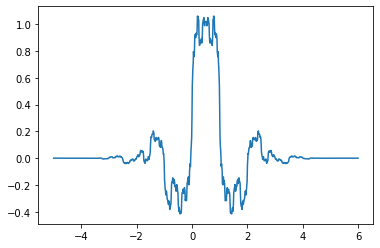

In [13]:
# L2 normalization
sf_t.plot(scale=1./l2_norm)

- Urban - 2009, Figure 5.5-5.11

In [14]:
a = sf_t.refinement_coeffs()
sum_a = a.sum()
print("refinement coefficients =", a)
print("sum =", sum_a)
assert np.isclose(sum_a, 2.)

refinement coefficients = [-0.01953125  0.05859375  0.07421875 -0.37890625 -0.1015625   1.3671875
  1.3671875  -0.1015625  -0.37890625  0.07421875  0.05859375 -0.01953125]
sum = 2.0


- Urban - 2009, Table 2.6-2.7

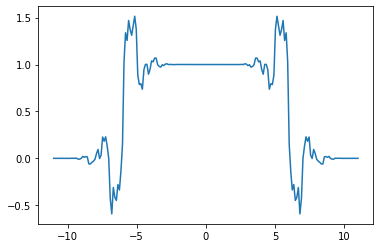

In [15]:
# partition of unity
nx = 200
x = np.linspace(-d-2*(d_t-1), d+2*(d_t-1), nx)
s = np.zeros(nx)
for k in range(sf_t.l1, sf_t.l2 + 1):
    s += sf_t(x + k)
plt.plot(x, s)
plt.show()
assert np.isclose(s[nx//2], 1.)

In [16]:
# biorthogonality
res = []
for k in range(sf.l1-sf_t.l2+1, sf.l2-sf_t.l1):
    res.append(quad(lambda x: sf(x)*sf_t(x-k), sf.l1, sf.l2)[0])
res = np.array(res)
print("biorthogonality:")
print(res)

exact = np.zeros_like(res)
exact[res.size//2] = 1.
assert np.allclose(res, exact, atol=1e-3)

<ipython-input-16-3a120d20a9d2>:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  res.append(quad(lambda x: sf(x)*sf_t(x-k), sf.l1, sf.l2)[0])


biorthogonality:
[ 1.08719790e-09 -2.72191546e-07 -5.22182310e-06 -5.26683128e-05
  1.66087124e-05  1.29698880e-04  9.99838410e-01  1.29698880e-04
  1.66087124e-05 -5.26683128e-05 -5.22182310e-06 -2.72191546e-07
  1.08719790e-09]


# Mother Wavelet

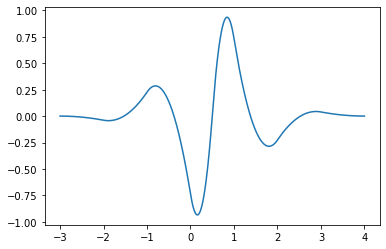

In [17]:
mw = MotherWavelet(d, d_t)
mw.plot()

In [18]:
l1_norm = quad(mw, mw.l1, mw.l2)[0]
print("L1 norm =", l1_norm)
assert np.isclose(l1_norm, 0.)

l2_norm = np.sqrt(quad(lambda x: mw(x)**2, mw.l1, mw.l2)[0])
print("L2 norm =", l2_norm)

L1 norm = -1.737240947061422e-16
L2 norm = 0.8692847199528779


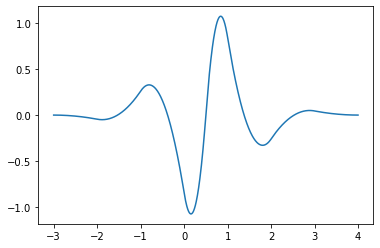

In [19]:
# L2 normalization
mw.plot(scale=1./l2_norm)

- Urban - 2009, Figure 5.5-5.11 (unknown normalization)

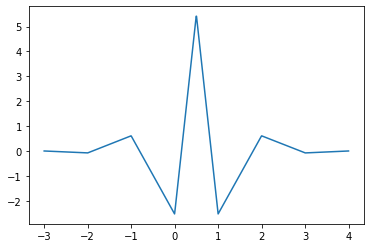

H1 norm = 3.458453069839304


<ipython-input-20-e3ebfe1359fe>:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  h1_norm = np.sqrt(quad(lambda x: mw_deriv(x)**2, mw.l1, mw.l2)[0] + l2_norm**2)


In [20]:
# first order derivative
mw.plot(nu=1)

mw_deriv = mw.derivative()
h1_norm = np.sqrt(quad(lambda x: mw_deriv(x)**2, mw.l1, mw.l2)[0] + l2_norm**2)
print("H1 norm =", h1_norm)

In [21]:
g = mw.gramian()
l2_norm_g = np.sqrt(g[d+d_t-2])
print("L2 norm from gramian =", l2_norm_g)
print("L2 norm from quadrature =", l2_norm)
assert np.isclose(l2_norm_g, l2_norm)

L2 norm from gramian = 0.869284720030881
L2 norm from quadrature = 0.8692847199528779


In [22]:
h = mw.inner_product(nu=1)
h1_norm_h = np.sqrt(h[d+d_t-2] + g[d+d_t-2])
print("H1 norm from inner product =", h1_norm_h)
print("H1 norm from quadrature =", h1_norm)
assert np.isclose(h1_norm_h, h1_norm)

H1 norm from inner product = 3.45845295036608
H1 norm from quadrature = 3.458453069839304
